# Adding Pokémon images to the dataset

Prepare dataset of Pokémon images for easy access in Pandas

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

Images downloaded from https://www.kaggle.com/dollarakshay/pokemon-images and extracted to the `data/POKEMON` folder.  The files are named according to their Pokedex number.

In [2]:
!ls -l data/POKEMON | head

total 67312
-rwxr-xr-x@ 1 allank  staff  49853 Nov 28  2017 0001.png
-rwxr-xr-x@ 1 allank  staff  50738 Nov 28  2017 0002.png
-rwxr-xr-x@ 1 allank  staff  47325 Nov 28  2017 0003.png
-rwxr-xr-x@ 1 allank  staff  37739 Nov 28  2017 0004.png
-rwxr-xr-x@ 1 allank  staff  38946 Nov 28  2017 0005.png
-rwxr-xr-x@ 1 allank  staff  47613 Nov 28  2017 0006.png
-rwxr-xr-x@ 1 allank  staff  39660 Nov 28  2017 0007.png
-rwxr-xr-x@ 1 allank  staff  45319 Nov 28  2017 0008.png
-rwxr-xr-x@ 1 allank  staff  52929 Nov 28  2017 0009.png


Read in all the images, extract the Pokedex number from the filename, convert the image data to preserve transparency and store as numpy array.

In [3]:
sprites = []
p = Path('data/POKEMON/')
for f in p.iterdir():
    if f.is_file():
        pokedex_number = int(f.name.split('.')[0])
        img = Image.open(f.absolute()).convert("RGBA")
        img_array = np.array(img)
        sprites.append({
            'pokedex_number': pokedex_number,
            'image_data': img_array
        })

Create a dataframe:  columns are `pokedex_number` (which we will use to join to our main data set) and `image_data` which contains the image as a numpy array.

In [4]:
df_sprites = pd.DataFrame(sprites)

Test that the image data in the dataframe is usable:

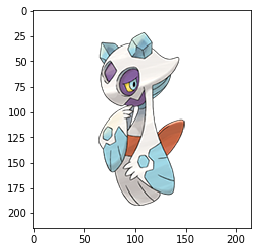

In [5]:
plt.imshow(df_sprites.sample(1).iloc[0]['image_data'])

Success - save the dataframe for later use.  Uncompressed file is 142MB, so compressing it in order to push to github.

In [6]:
df_sprites.to_pickle('data/dataframes/pokemon_sprites.pickle.bz2', compression='bz2')

Lastly, check that we can read the data back in and work with it:

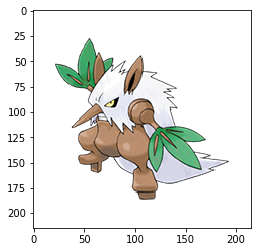

In [7]:
df_test = pd.read_pickle('data/dataframes/pokemon_sprites.pickle.bz2', compression='bz2')
plt.imshow(df_test.sample(1).iloc[0]['image_data'])

All good!

Icons would be handy for the types.  There are 18 types, and there looks to be a really nice icon set here: https://www.vecteezy.com/vector-art/119820-free-type-pokemon-vector

Icons cropped and layered added to a Photoshop document, and exported as PNG images to the `data/types` folder.

In [2]:
!ls -l data/types | head

total 136
-rw-r--r--@ 1 allank  staff  2348 Sep 24 13:53 bug.png
-rw-r--r--@ 1 allank  staff  2477 Sep 24 13:53 dark.png
-rw-r--r--@ 1 allank  staff  2455 Sep 24 13:50 dragon.png
-rw-r--r--@ 1 allank  staff  2299 Sep 24 13:51 electric.png
-rw-r--r--@ 1 allank  staff  2498 Sep 24 13:52 fighting.png
-rw-r--r--@ 1 allank  staff  2451 Sep 24 13:49 fire.png
-rw-r--r--@ 1 allank  staff  2421 Sep 24 13:53 flying.png
-rw-r--r--@ 1 allank  staff  2476 Sep 24 13:50 ghost.png
-rw-r--r--@ 1 allank  staff  2259 Sep 24 13:49 grass.png


In [7]:
types = []
p = Path('data/types/')
for f in p.iterdir():
    if f.is_file():
        poke_type = f.name.split('.')[0].strip()
        img = Image.open(f.absolute()).convert("RGBA")
        img_array = np.array(img)
        types.append({
            'type': poke_type,
            'image_data': img_array
        })

In [9]:
df_type_icons = pd.DataFrame(types)

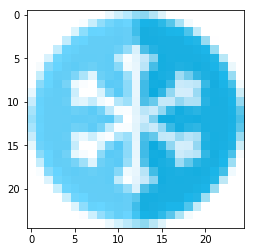

In [10]:
plt.imshow(df_type_icons.sample(1).iloc[0]['image_data'])

In [11]:
df_type_icons.to_pickle('data/dataframes/pokemon_type_icons.pickle.bz2', compression='bz2')

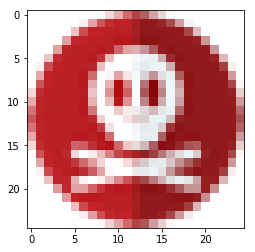

In [12]:
df_test = pd.read_pickle('data/dataframes/pokemon_type_icons.pickle.bz2', compression='bz2')
plt.imshow(df_test.sample(1).iloc[0]['image_data'])